#Association Rules 


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [8]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


Counting the itemsets

In [9]:
book.shape

(2000, 11)

# Aprori Algorithm

In [10]:
frequent_itemsets_ap = apriori(book, min_support = 0.1)

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
print(len(frequent_itemsets_ap))

39


In [12]:
frequent_itemsets_ap = apriori(book, min_support=0.1, use_colnames= True, verbose=1)
print(frequent_itemsets_ap.head())

Processing 44 combinations | Sampling itemset size 4
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
frequent_itemsets_ap.sort_values("support", ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [14]:
rules_ap = association_rules(frequent_itemsets_ap, metric= "confidence", min_threshold=0.4)
print(rules_ap.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423    0.165   
1   (CookBks)  (ChildBks)              0.4310               0.423    0.256   
2  (ChildBks)   (CookBks)              0.4230               0.431    0.256   
3  (ChildBks)  (DoItYBks)              0.4230               0.282    0.184   
4  (DoItYBks)  (ChildBks)              0.2820               0.423    0.184   

   confidence      lift  leverage  conviction  
0    0.666667  1.576044  0.060308    1.731000  
1    0.593968  1.404179  0.073687    1.421069  
2    0.605201  1.404179  0.073687    1.441240  
3    0.434988  1.542511  0.064714    1.270770  
4    0.652482  1.542511  0.064714    1.660347  


In [15]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(70, 9)

In [16]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
55,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
59,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
66,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
67,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
40,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

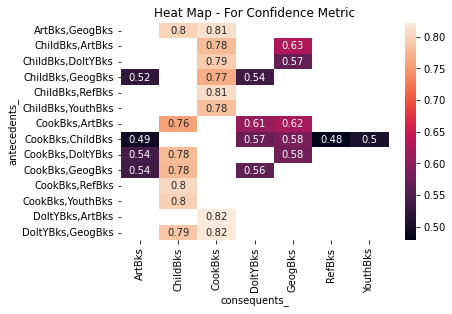

In [17]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [18]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.6)
print(rules_ap_li.shape)

(100, 9)


In [19]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
52,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

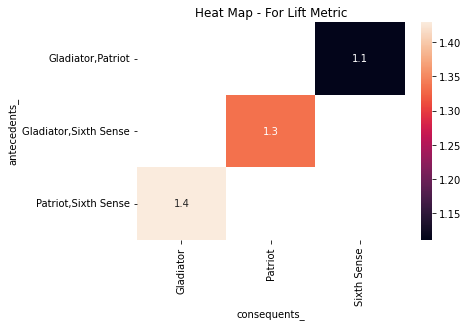

In [33]:
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# MY MOVIES Dataset

In [34]:
movie=pd.read_csv('my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [35]:
# Get list of categorical variables
s = (movie.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [36]:
num_movie = movie.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


# Apriori Algorithm

In [37]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [38]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [39]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.5    0.714286  1.190476      0.08         1.4  
1      0.5    0.833333  1.190476      0.08         1.8  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    1.000000  1.666667      0.08         inf  


In [40]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

In [41]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

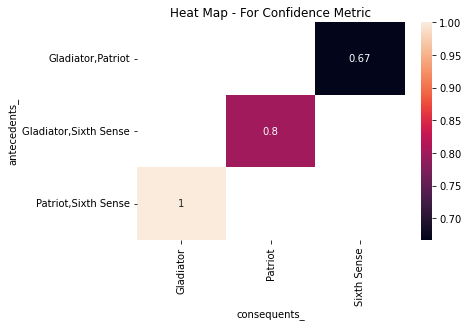

In [42]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [43]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 9)


In [44]:

rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

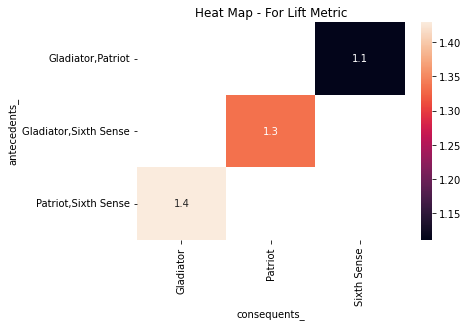

In [45]:
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)